# CNN Flores 

#### Sacar las Fotos de las flores
codigo que utilice para sacar fotos de los videos que tome de las flores

## Obtener el tamño de las imagenes

In [5]:
import cv2 
import numpy as np

img = cv2.imread('C:\\Users\\ocvio\\Downloads\\DataSetFlores\\LiliHolandesa\\foto_964.png')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Importar Librerias

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar DataSet Imagenes

In [3]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\ocvio\\Downloads\\DataSetFlores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))



leyendo imagenes de  C:\Users\ocvio\Downloads\DataSetFlores\
C:\Users\ocvio\Downloads\DataSetFlores\Bugambilia 1
C:\Users\ocvio\Downloads\DataSetFlores\Gerbera 7976
C:\Users\ocvio\Downloads\DataSetFlores\LiliHolandesa 10494
C:\Users\ocvio\Downloads\DataSetFlores\NocheBuenas 10482
C:\Users\ocvio\Downloads\DataSetFlores\Orquideas 7579
Directorios leidos: 5
Imagenes en cada directorio [7977, 10494, 10482, 7579, 7579]
suma Total de imagenes en subdirs: 44111


# Creamos las Etiquetas

In [21]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  44111


In [22]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 Bugambilia
1 Gerbera
2 LiliHolandesa
3 NocheBuenas
4 Orquideas


In [23]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy
print(X)

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

[[[[0.34117648 0.32156864 0.2627451 ]
   [0.43529412 0.40392157 0.3372549 ]
   [0.61960787 0.5882353  0.5176471 ]
   ...
   [0.61960787 0.42352942 0.30980393]
   [0.8        0.6039216  0.4627451 ]
   [0.7647059  0.59607846 0.4627451 ]]

  [[0.83137256 0.8156863  0.7764706 ]
   [0.6862745  0.6862745  0.64705884]
   [0.8        0.7921569  0.7411765 ]
   ...
   [0.29411766 0.24313726 0.16078432]
   [0.2627451  0.22745098 0.14901961]
   [0.2901961  0.23529412 0.15294118]]

  [[0.78431374 0.7647059  0.73333335]
   [0.79607844 0.7764706  0.73333335]
   [0.84705883 0.8235294  0.7607843 ]
   ...
   [0.8156863  0.75686276 0.5882353 ]
   [0.49411765 0.47058824 0.36078432]
   [0.28627452 0.27450982 0.18039216]]

  ...

  [[0.7372549  0.         0.45490196]
   [0.79607844 0.         0.59607846]
   [0.9137255  0.05882353 0.73333335]
   ...
   [0.38039216 0.34509805 0.36862746]
   [0.47058824 0.4627451  0.46666667]
   [0.36862746 0.49803922 0.25882354]]

  [[0.77254903 0.         0.4627451 ]
   [0.8

# Creamos Set de Entrenamiento y Prueba

In [24]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (35288, 21, 28, 3) (35288,)
Testing data shape :  (8823, 21, 28, 3) (8823,)


Text(0.5, 1.0, 'Ground Truth : 0')

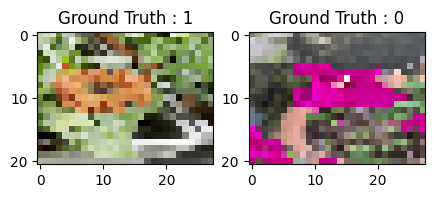

In [25]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

## Hacemos el One-hot Encoding para la red

In [26]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [27]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [28]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(28230, 21, 28, 3) (7058, 21, 28, 3) (28230, 5) (7058, 5)


# Creamos el modelo CNN

In [29]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [34]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
flower_model.add(Activation('relu'))
flower_model.add(MaxPooling2D((2, 2), padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
flower_model.add(Activation('relu'))
flower_model.add(MaxPooling2D((2, 2), padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [35]:
flower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 11, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 11, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 14, 64)        18496     
                                                                 
 activation_10 (Activation)  (None, 11, 14, 64)        0         
                                                      

In [36]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el Modelo: aprende a clasificar imágenes

In [37]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
442/442 [==============================] - 15s 32ms/step - loss: 1.6523 - accuracy: 0.2137 - val_loss: 1.6021 - val_accuracy: 0.3001
Epoch 2/20
442/442 [==============================] - 16s 37ms/step - loss: 1.6006 - accuracy: 0.2338 - val_loss: 1.5982 - val_accuracy: 0.3225
Epoch 3/20
442/442 [==============================] - 16s 37ms/step - loss: 1.5885 - accuracy: 0.2439 - val_loss: 1.5927 - val_accuracy: 0.3759
Epoch 4/20
442/442 [==============================] - 16s 37ms/step - loss: 1.5736 - accuracy: 0.2543 - val_loss: 1.5847 - val_accuracy: 0.4004
Epoch 5/20
442/442 [==============================] - 17s 37ms/step - loss: 1.5577 - accuracy: 0.2587 - val_loss: 1.5698 - val_accuracy: 0.2729
Epoch 6/20
442/442 [==============================] - 16s 36ms/step - loss: 1.5330 - accuracy: 0.2702 - val_loss: 1.5440 - val_accuracy: 0.3162
Epoch 7/20
442/442 [==============================] - 15s 35ms/step - loss: 1.4880 - accuracy: 0.2932 - val_loss: 1.4901 - val_accuracy:

In [63]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("C:\\Users\\ocvio\\Downloads\\CNNmodel1\\flowers_modelCNN.h5")

c:\Users\ocvio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluamos la Red

In [39]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

276/276 [==============================] - 2s 6ms/step - loss: 0.3111 - accuracy: 0.8562


In [40]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3111245930194855
Test accuracy: 0.8561713695526123


In [41]:
flower_train.history

{'loss': [1.6522655487060547,
  1.600587248802185,
  1.5884535312652588,
  1.573610782623291,
  1.557671308517456,
  1.5330060720443726,
  1.4880293607711792,
  1.4111360311508179,
  1.2883265018463135,
  1.1273752450942993,
  0.9935962557792664,
  0.876107931137085,
  0.7767952680587769,
  0.6922746300697327,
  0.6135056018829346,
  0.5607979893684387,
  0.5089105367660522,
  0.46871405839920044,
  0.43923187255859375,
  0.4034147560596466],
 'accuracy': [0.213673397898674,
  0.23379383981227875,
  0.24392490088939667,
  0.25426849722862244,
  0.2586610019207001,
  0.27024441957473755,
  0.2931632995605469,
  0.3448813259601593,
  0.4435352385044098,
  0.5303577780723572,
  0.5839886665344238,
  0.6382217407226562,
  0.6885936856269836,
  0.7237336039543152,
  0.7552958130836487,
  0.7727949023246765,
  0.7929507493972778,
  0.8105207085609436,
  0.8190577626228333,
  0.837300717830658],
 'val_loss': [1.602076530456543,
  1.5981916189193726,
  1.5927226543426514,
  1.5847079753875732,

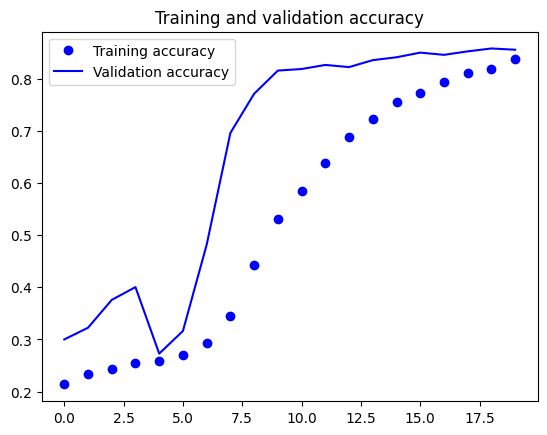

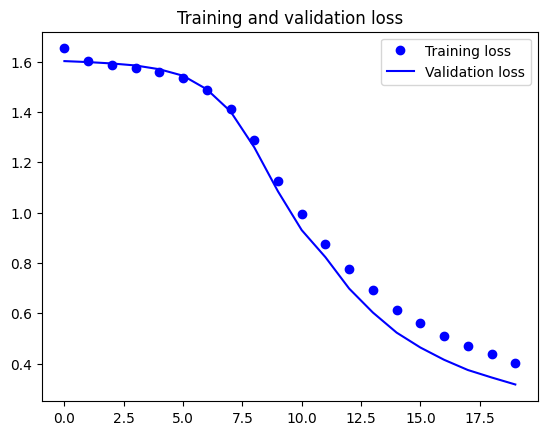

In [42]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
predicted_classes2 = flower_model.predict(test_X)

276/276 [==============================] - 4s 6ms/step


In [44]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [45]:
predicted_classes.shape, test_Y.shape

((8823,), (8823,))

# Aprendamos de los errores: Qué mejorar?

#### Correctos

Found 7554 correct labels


C:\Users\ocvio\AppData\Local\Temp\ipykernel_61208\318155589.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


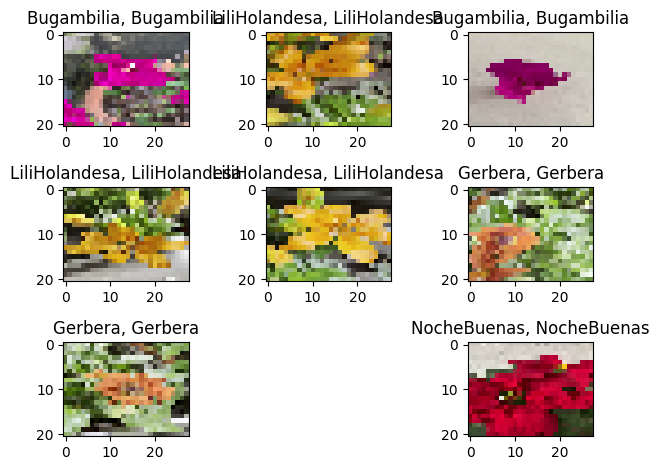

In [46]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

#### Incorrectos

Found 1269 incorrect labels


C:\Users\ocvio\AppData\Local\Temp\ipykernel_61208\603376305.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


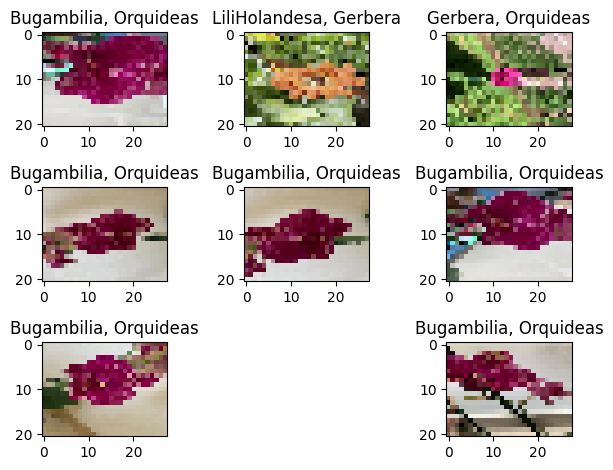

In [47]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [48]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.58      1.00      0.73      1571
     Class 1       0.94      1.00      0.97      2140
     Class 2       1.00      0.97      0.99      2069
     Class 3       1.00      0.99      0.99      1561
     Class 4       1.00      0.20      0.33      1482

    accuracy                           0.86      8823
   macro avg       0.90      0.83      0.80      8823
weighted avg       0.91      0.86      0.83      8823



# Predecir una imágen Nueva

In [62]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Especifica la ruta de la imagen
filepath = 'C:\\Users\\ocvio\\Downloads\\TestFlores\\Bugambilia (2).png'
#"C:\Users\ocvio\Downloads\TestFlores\Bugambilia (2).png"

# Lee la imagen
image = plt.imread(filepath, 0)

# Redimensiona la imagen
image_resized = resize(image, (21, 28), anti_aliasing=True, clip=False, preserve_range=True)

# Convierte la imagen redimensionada a un arreglo numpy
X = np.array([image_resized])

# Realiza la predicción usando el modelo (asegúrate de haber definido 'sport_model' previamente)
predicted_classes = flower_model.predict(X)

# Obtiene la clase predicha para la imagen
predicted_class_index = np.argmax(predicted_classes)

# Imprime la clase predicha
print(f'La imagen {filepath} pertenece a la clase: {flores[predicted_class_index]}')

1/1 [==============================] - 0s 412ms/step
La imagen C:\Users\ocvio\Downloads\TestFlores\Bugambilia (2).png pertenece a la clase: Bugambilia


In [58]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ["C:\\Users\\ocvio\\Downloads\\TestFlores\\Gerbera (1).png"]
#"C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png"
for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images) #convierto de lista a numpy

predicted_classes = flower_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[0], flores[img_tagged.tolist().index(max(img_tagged))])

276/276 [==============================] - 3s 9ms/step
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Bugambilia
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Bugambilia
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Bugambilia
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Gerbera
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Gerbera
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png NocheBuenas
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png NocheBuenas
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png LiliHolandesa
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).png Bugambilia
C:\Users\ocvio\Downloads\TestFlores\Gerbera (1).p